# Principal Component Analysis

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


### 1. PCA on Images


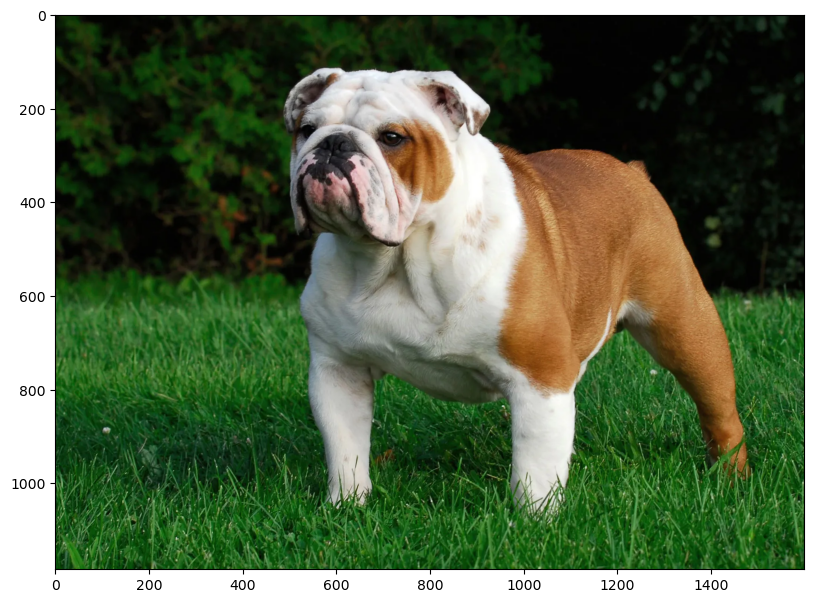

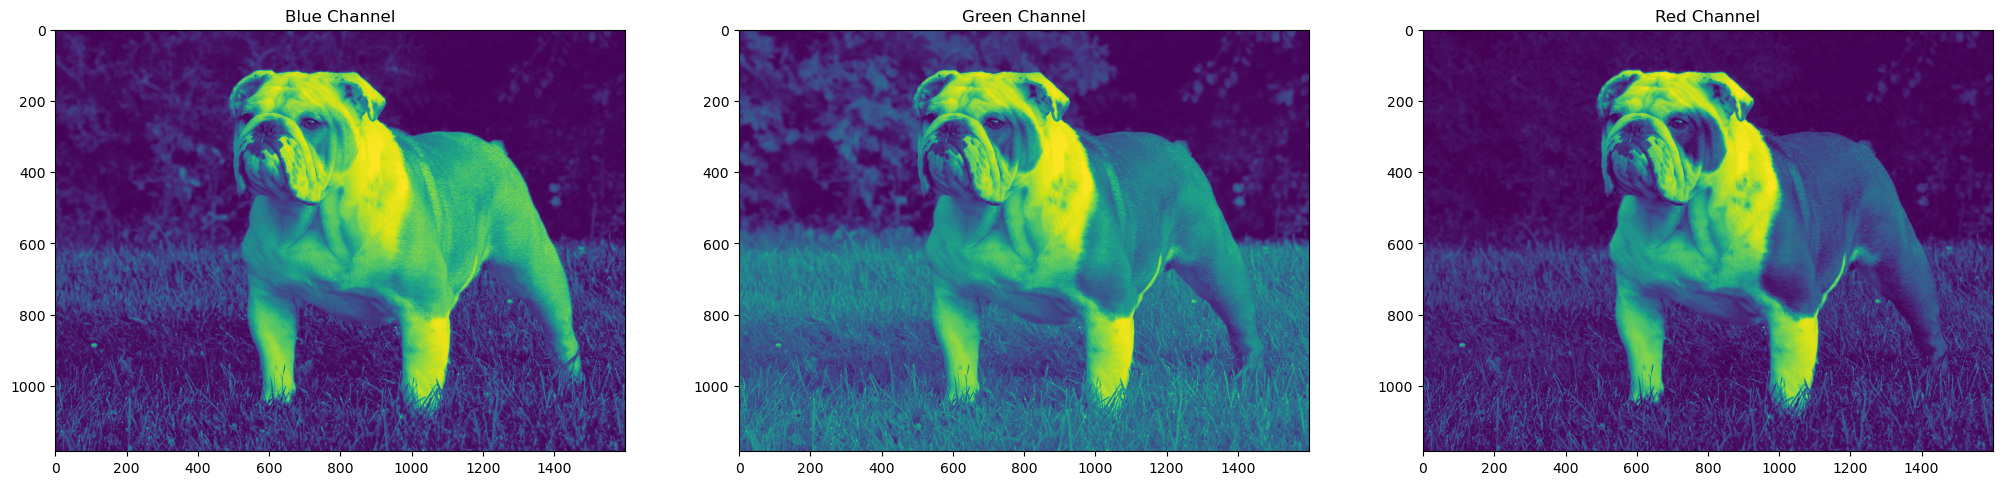

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2
from scipy.stats import stats
import matplotlib.image as mpimg
img = cv2.cvtColor(cv2.imread('English-bulldog-dog.jpg'), cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize = (15, 7.2)) 
plt.imshow(img)
plt.show()

#Splitting into channels
blue,green,red = cv2.split(img)
# Plotting the images
fig = plt.figure(figsize = (25, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(blue)
fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(green)
fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(red)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


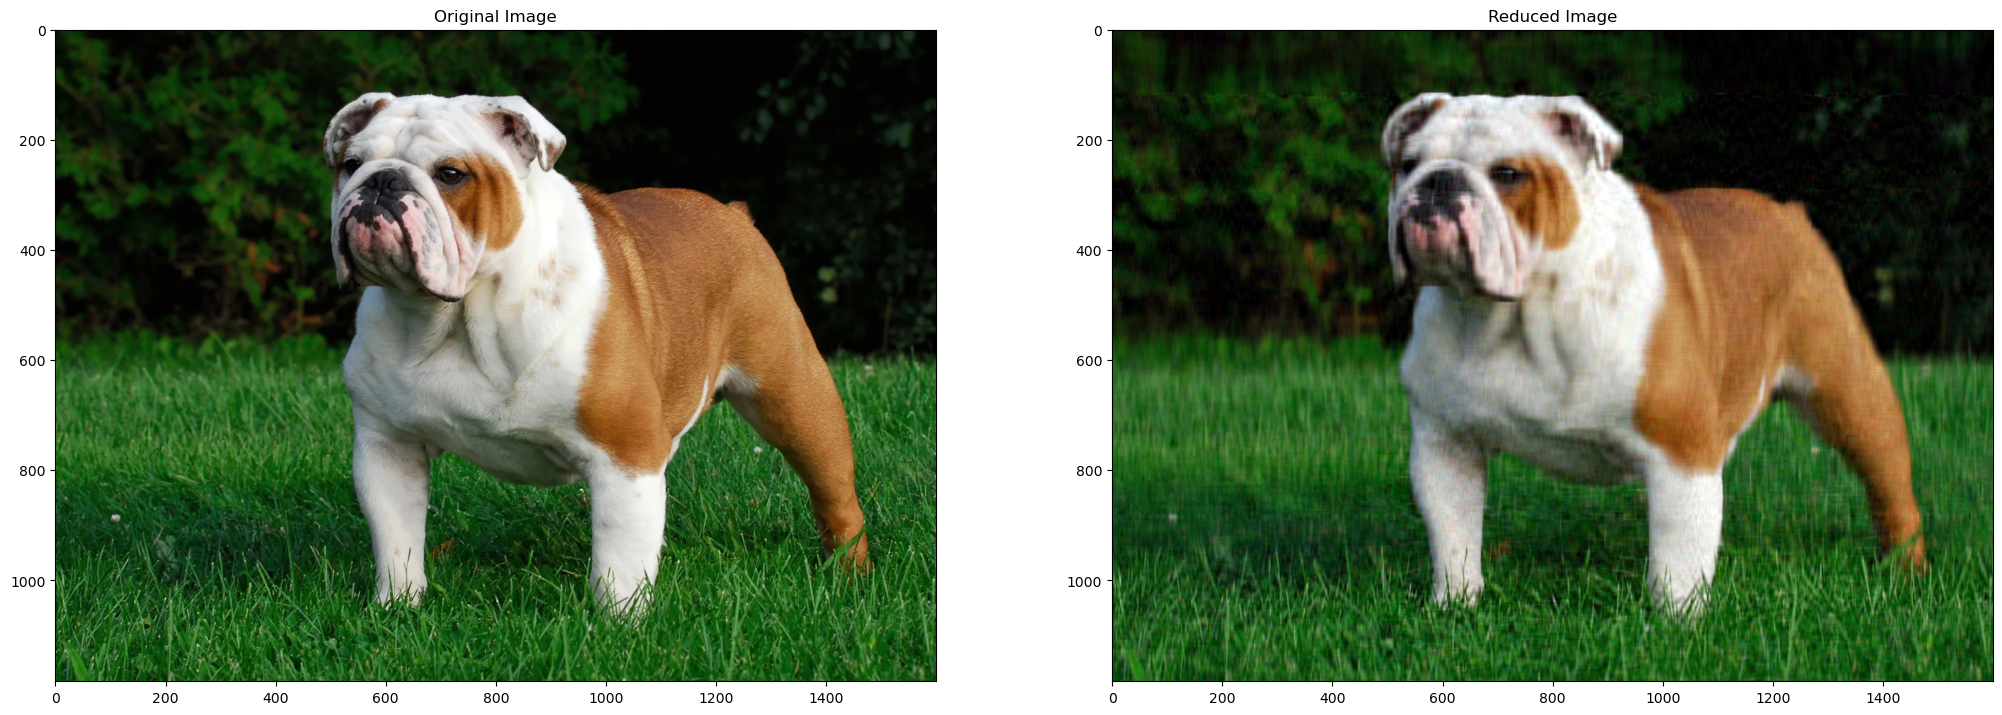

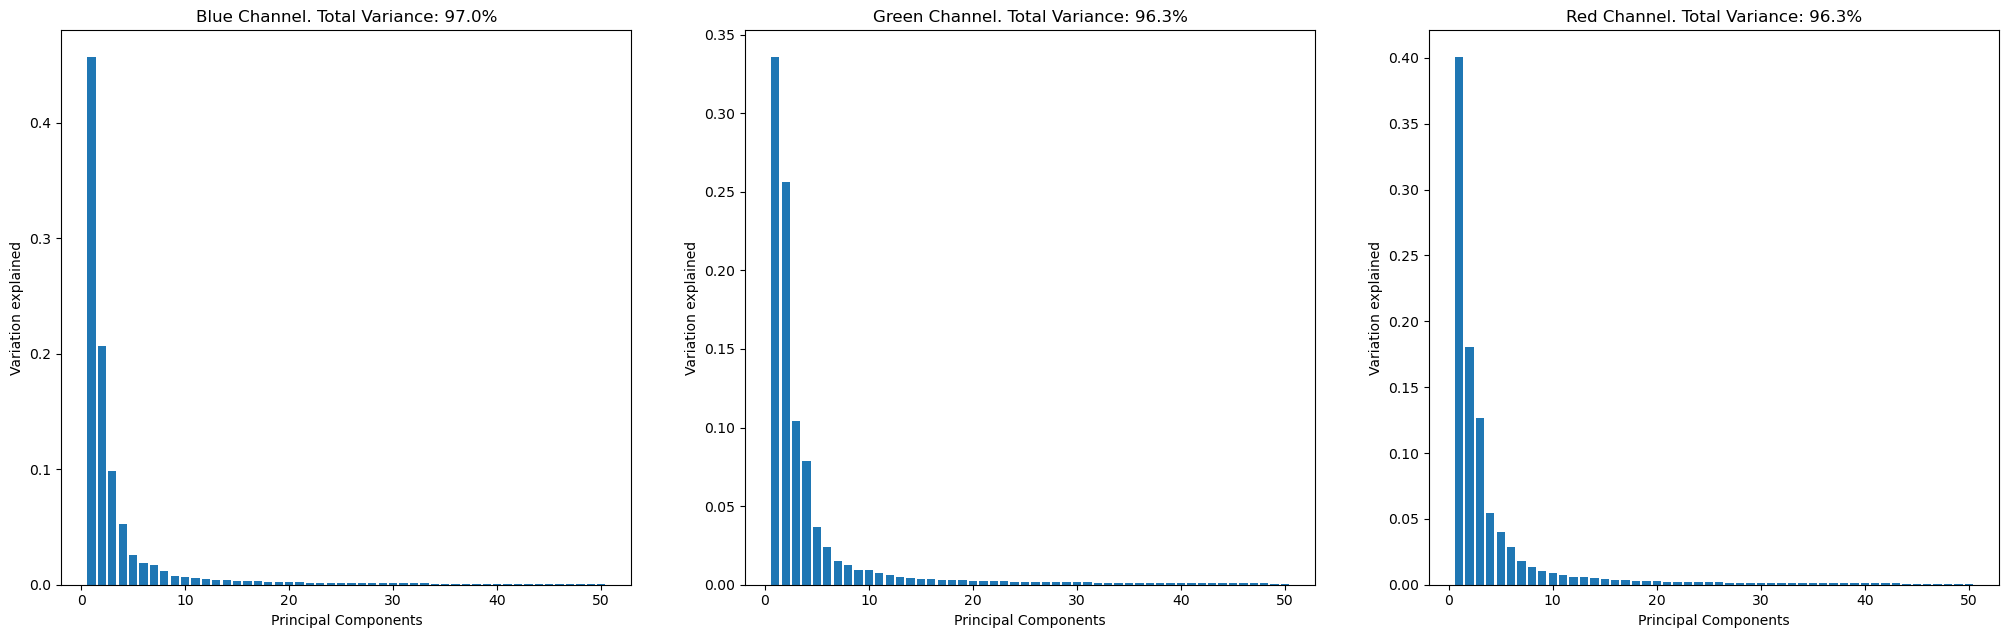

In [7]:
n_components = 50

df_blue = blue/255
df_green = green/255
df_red = red/255

pca_b = PCA(n_components=n_components)
pca_b.fit(df_blue)
trans_pca_b = pca_b.transform(df_blue)
pca_g = PCA(n_components=n_components)
pca_g.fit(df_green)
trans_pca_g = pca_g.transform(df_green)
pca_r = PCA(n_components=n_components)
pca_r.fit(df_red)
trans_pca_r = pca_r.transform(df_red)

# print(f"Blue Channel : {sum(pca_b.explained_variance_ratio_)}")
# print(f"Green Channel: {sum(pca_g.explained_variance_ratio_)}")
# print(f"Red Channel  : {sum(pca_r.explained_variance_ratio_)}")

b_arr = pca_b.inverse_transform(trans_pca_b)
g_arr = pca_g.inverse_transform(trans_pca_g)
r_arr = pca_r.inverse_transform(trans_pca_r)
img_reduced= (cv2.merge((b_arr, g_arr, r_arr)))

fig = plt.figure(figsize = (25, 27.2)) 
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img)
fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(img_reduced)
plt.show()

fig = plt.figure(figsize = (25, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel. Total Variance: " + str(round(100*sum(pca_b.explained_variance_ratio_), 1)) + "%")
plt.ylabel('Variation explained')
plt.xlabel('Principal Components')
plt.bar(list(range(1,n_components +1 )),pca_b.explained_variance_ratio_)
fig.add_subplot(132)
plt.title("Green Channel. Total Variance: " + str(round(100*sum(pca_g.explained_variance_ratio_), 1)) + "%")
plt.ylabel('Variation explained')
plt.xlabel('Principal Components')
plt.bar(list(range(1,n_components +1)),pca_g.explained_variance_ratio_)
fig.add_subplot(133)
plt.title("Red Channel. Total Variance: " + str(round(100*sum(pca_r.explained_variance_ratio_), 1)) + "%")
plt.ylabel('Variation explained')
plt.xlabel('Principal Components')
plt.bar(list(range(1,n_components +1)),pca_r.explained_variance_ratio_)
plt.show()


### 2. Modeling

In [4]:
import pandas as pd
df = pd.read_csv('titanic.csv')
# Assign input variables
X = df.loc[:,['Pclass','Sex','Age','Fare','Embarked','SibSp','Parch']]

# Assign target variable
y = df['Survived']

# Replace missing values by the median
X["Age"] = X["Age"].fillna(X["Age"].median())

# Impute the Embarked variable
X["Embarked"] = X["Embarked"].fillna("S")

# Change Pclass to categorical variable
X['Pclass'] = X['Pclass'].astype(object)

# Encode categorical variable
X = pd.get_dummies(X)

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

C:\Users\snguyen4\Anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


#### Without PCA

In [5]:
from sklearn.ensemble import GradientBoostingClassifier
r1 = GradientBoostingClassifier(n_estimators=100, learning_rate=1)
r1.fit(x_train, y_train)
# Accuracry on test data
print("Testing Accuracy: ", r1.score(x_test, y_test))

Testing Accuracy:  0.8022388059701493


#### With PCA

In [6]:
n_components = 6

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(x_train)
# Apply transform to both the training set and the test set.
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

pca = PCA(n_components = n_components)

pca.fit(x_train)
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

print('Variance Explained: ',pca.explained_variance_ratio_.sum())

from sklearn.ensemble import GradientBoostingClassifier
r1 = GradientBoostingClassifier(n_estimators=100, learning_rate=1)
r1.fit(x_train, y_train)
# Accuracry on test data
print("Testing Accuracy: ", r1.score(x_test, y_test))

Variance Explained:  0.8649785427384783
Testing Accuracy:  0.746268656716418


### 3. Practice

Do the follows and show your work in class to the instructor for credit. 

1. In Python, apply PCA with Gradient Boosting on the Breast Cancer data.  In the PCA use 5 principal components to extract the original data. Compare the accuracy of the Gradient Boosting with and without PCA. 

2. In Python, apply PCA with Gradient Boosting on the Breast Cancer data.  In the PCA, use at least 80% of the variance in the original data. Compare the accuracy of the Gradient Boosting with and without PCA. 

